Advanced Optimization methods

No need for learning rate hyper-parameter ($\alpha$).

Usually converge much faster than gradient descent.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

Cost function

The cost function is the function which we need to minimize.

In [26]:
def J(theta):
    return (theta[0] -5)**2 +(theta[1]-5)**2

Plot cost function

In [27]:
t_0=np.linspace(0,10,100)
t_1=np.linspace(0,10,100)
T_0,T_1=np.meshgrid(t_0,t_1)
Z=(T_0 -5)**2 +(T_1 -5)**2

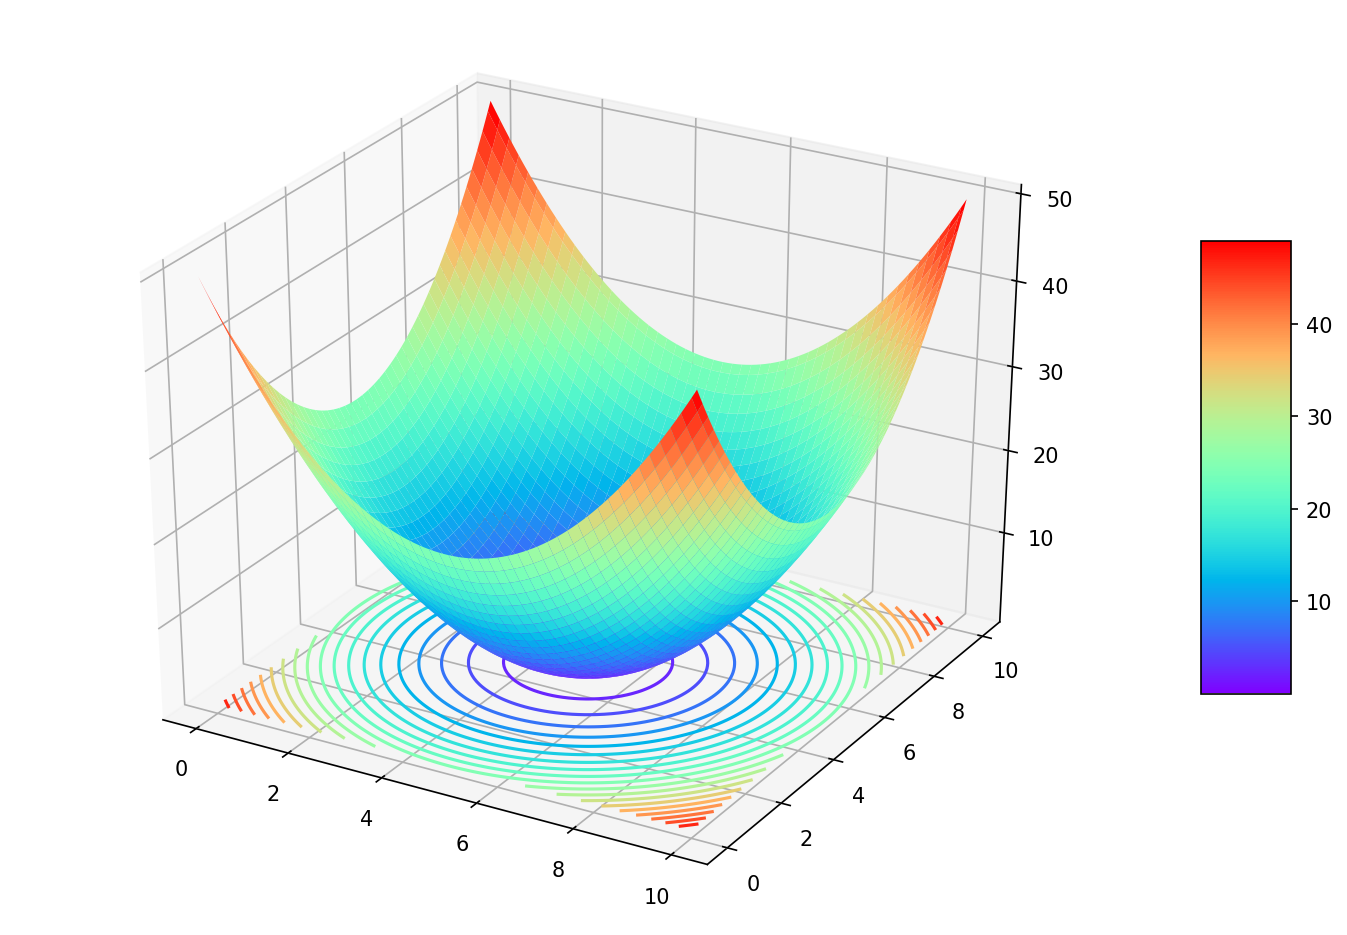

In [28]:
fig=plt.figure(figsize=(12,8), dpi=150)
ax=fig.gca(projection="3d")
surf=ax.plot_surface(T_0, T_1, Z, cmap=plt.cm.rainbow)
cset = ax.contour(T_0, T_1, Z, 20, zdir='z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


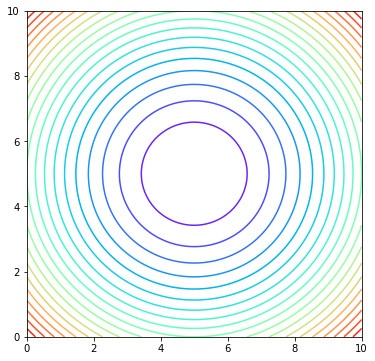

In [29]:

plt.figure(figsize=(6, 6))
cset = plt.contour(T_0, T_1, Z, 20, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

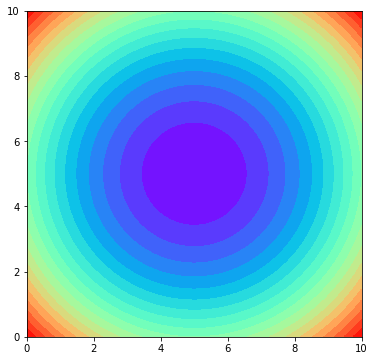

In [30]:

plt.figure(figsize=(6, 6))
cset = plt.contourf(T_0, T_1, Z, 20, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Using scipy.optimize.minimize

After defining the cost function, we can use the minimize function from scipy.optimize to minimize the cost function.

To use the minimize function, we need to provide the following three arguments:

1.The first argument is the cost function itself.

2.The second argument is our initial guess.

3.The optimization method (CG, BFGS, ...)

In [31]:
minimize(J, x0=[0, 0], method='CG')

     fun: 2.477476329894505e-18
     jac: array([1.71271335e-08, 1.71271335e-08])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([5., 5.])

In [35]:

minimize(J, x0=[10, -3], method='CG')


     fun: 2.730455135196181e-16
     jac: array([ 1.12131602e-08, -1.79405912e-08])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([5.        , 4.99999998])

In [36]:
minimize(J, x0=np.random.randn(2), method='CG')

     fun: 3.5244940955233144e-16
     jac: array([-1.05752367e-08, -1.26805499e-08])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([4.99999999, 4.99999999])

In [37]:
result = minimize(J, x0=np.random.randn(2), method='CG')

In [38]:

minimize(J, x0=[0, 0], method='BFGS')

      fun: 3.5538794606501983e-16
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([-1.17592194e-08, -1.17592194e-08])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.99999999, 4.99999999])

Providing gradient information

In [39]:
def gradients(theta):
    return np.array([2 * (theta[0] - 5), 2 * (theta[1] - 5)])

In [40]:
gradients([5, 5])

array([0, 0])

In [41]:
minimize(J, x0=np.random.randn(2), method='CG', jac=gradients)

     fun: 2.1213425515562547e-16
     jac: array([-1.91495513e-08, -2.19506653e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([4.99999999, 4.99999999])